In [1]:
"""
  This script reproduces Figure 3 in [1] Rubbens, Anne, and Taylor, Adrien B. "One-point extensions of function and operator classes."

  Given (xs,fs,gs)=(0,0,0), (x1,f1,g1)=(1,1/4,1/2), x2=3/8 mu=1/2 and L=1, it plots the allowed region for f2 as a function of g2, according to 
  p_L, satisfied at {(x_i,f_i,g_i),(x_j,f_j,g_j)} if and only if:
      fi<=fs+||gi||^2/2/mu, fi>=fs,  fi>=fj+1/2<gi+gj,xi-xj>+1/4/L||gi-gj||^2-L/4||xi-xj||^2,
  and to tilde{p}_L, satisfied at {(x_i,f_i,g_i),(x_j,f_j,g_j)} if and only if:
      fi<=fs+||gi||^2/2/mu, fi>=fs+||gi||^2/2/L,
      fi>=fj+1/2<gi+gj,xi-xj>+1/4/L||gi-gj||^2-L/4||xi-xj||^2+max_{0<=alpha<=2mu/(2L+mu)}(alpha/(1-alpha)(fj+||gj||^2/2/L)-L/4(L+mu)(1-alpha)alpha/((L+mu)(1-alpha)^2-(L-mu))||xj-xi+(gi+gj)/L||^2)

"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Matplotlib is building the font cache; this may take a moment.


In [2]:
def f_max(alpha, x1, f1, g1, x2, g2, L, mu):
    """
    Computation of the last condition in tilde{p}_L, i=1, j=2: upper bound on f2 to be minimized
    """
    y = (1 - alpha) * (f1 - 0.5 * (g1 + g2) * (x1 - x2) - (1 / (4 * L)) * (g1 - g2) ** 2 + (L / 4) * (x1 - x2) ** 2) - \
        (alpha * g2 ** 2) / (2 * L) + alpha * (L / 4) * (x2 - x1 + (g2 + g1) / L) ** 2 * (L + mu) * (1 - alpha) ** 2 / \
        ((L + mu) * (1 - alpha) ** 2 - (L - mu))
    return y

def f_min(alpha, x1, f1, g1, x2, g2, L, mu):
    """
    Computation of the last condition in tilde{p}_L, i=2, j=1: lower bound on f2 to be maximized
    """
    y = -(f1 + 0.5 * (g1 + g2) * (x2 - x1) + (1 / (4 * L)) * (g1 - g2) ** 2 - (L / 4) * (x1 - x2) ** 2 + \
        (alpha / (1 - alpha)) * (f1 + (g1 ** 2) / (2 * L)) - (L / 4) * (L + mu) * (1 - alpha) * alpha / \
        ((L + mu) * (1 - alpha) ** 2 - (L - mu)) * (x1 - x2 + (g1 + g2) / L) ** 2)
    return y

In [3]:
# Function to compute the extremal value for f2
def extremal_val_loja(xs, fs, gs, x1, f1, g1, x2, g2, L, mu, constr, objective):
    """
    This function computes the extremal value for f2 such that
    {(xs, fs, gs) (x1, f1, g1), (x2, f2, g2)} satisfies p_L or tilde{p}_L.
    
    Arguments:
        -xs, fs, gs, x1, f1, g1, x2, g2: Dataset values with respect to which f2 has to satisfy p_L or tilde{p}_L.
        -L, mu: Parameters of p_L or tilde{p}_L.
        -constr: If constr >= 0, it ensures the set satisfies p_L. Otherwise, it ensures the set satisfies tilde{p}_L.
        -objective: If objective >= 0, extremal_val_loja computes the minimal value for f2. Else, it computes its maximal value.
    
    Returns:
        -f2: Extremal value for f2.
    """    
    # Computation of the last condition in tilde{p}_L
    # i=2, j=1
    alpha = 1/10
    fun_min = lambda alpha: f_min(alpha, x1, f1, g1, x2, g2, L, mu)
    res_min = minimize(fun_min, alpha, bounds=[(0, mu/(2*L+mu))])
    fmin = -res_min.fun
    # i=1, j=2
    fun_max = lambda alpha: f_max(alpha, x1, f1, g1, x2, g2, L, mu)
    res_max = minimize(fun_max, alpha, bounds=[(0, mu/(2*L+mu))])
    fmax = res_max.fun

    
    # Ensuring that {(xs, fs, gs), (x1, f1, g1), (x2, f2, g2)} satisfies p_L by bounding f2.
    bound_min = max(0, fs + 0.5 * (gs + g2) * (x2 - xs) + (1 / (4 * L)) * (g2 - gs)**2 - (L / 4) * (x2 - xs)**2,
                    f1 + 0.5 * (g1 + g2) * (x2 - x1) + (1 / (4 * L)) * (g2 - g1)**2 - (L / 4) * (x2 - x1)**2)
    bound_max = min(g2**2 / (2 * mu),
                    (fs + 0.5 * (gs + g2) * (x2 - xs) - (1 / (4 * L)) * (g2 - gs)**2 + (L / 4) * (x2 - xs)**2),
                    (f1 + 0.5 * (g1 + g2) * (x2 - x1) - (1 / (4 * L)) * (g2 - g1)**2 + (L / 4) * (x2 - x1)**2))
    if constr<=0:
        bound_min = max(g2**2 / (2 * L), fmin, bound_min)     
        bound_max = min(g2**2 / (2 * mu), fmax, bound_max)
    bounds=[(bound_min,bound_max)]
    # Initial value for f2
    f2_0 = 1
    # Minimization or maximization of f2
    def fun_obj(f2):
        return f2*objective

    res = minimize(fun_obj, f2_0, bounds=bounds, options={'disp': False})
    
    return res.x[0]   


In [4]:
# Dataset and parameters
fs = 0
xs = 0
gs = 0
x1 = 1
g1 = 1/2
f1 = 1/4
x2 = 3/8
L = 1
mu = 1/2

# Interval of values for g2
N = 100
G2_1 = np.linspace(0.0928, 3/8, N)
G2_2 = np.linspace(0.0928, 0.337, N)


# Initialize arrays for f2_min and f2_max
f2_min = np.zeros((2, N))
f2_max = np.zeros((2, N))

# Compute the extremal values for f2 as a function of g2
for i in range(N):
    f2_min[0, i] = extremal_val_loja(xs, fs, gs, x1, f1, g1, x2, G2_1[i], L, mu, 1, 1)
    f2_max[0, i] = extremal_val_loja(xs, fs, gs, x1, f1, g1, x2, G2_1[i], L, mu, 1, -1)
    f2_min[1, i] = extremal_val_loja(xs, fs, gs, x1, f1, g1, x2, G2_2[i], L, mu, -1, 1)
    f2_max[1, i] = extremal_val_loja(xs, fs, gs, x1, f1, g1, x2, G2_2[i], L, mu, -1, -1)

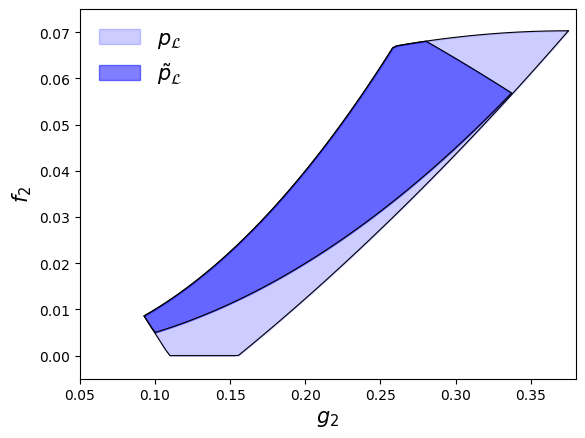

In [5]:
# Plot the result
plt.fill_between(G2_1, f2_min[0, :], f2_max[0, :], color='blue', alpha=0.2, label=r'$p_{\mathcal{L}}$')
plt.fill_between(G2_2, f2_min[1, :], f2_max[1, :], color='blue', alpha=0.5, label=r'$\tilde{p}_{\mathcal{L}}$')
plt.plot(G2_1, f2_min[0,:], color='black', linewidth=0.8)  
plt.plot(G2_1, f2_max[0,:], color='black', linewidth=0.8)
plt.plot(G2_2, f2_min[1,:], color='black', linewidth=0.8)  
plt.plot(G2_2, f2_max[1,:], color='black', linewidth=0.8)
# Adding labels and formatting
plt.xlabel(r'$g_2$', fontsize=15)
plt.ylabel(r'$f_2$', fontsize=15)
plt.xlim([0.05, 0.38])
plt.ylim([-0.005, 0.075])
plt.legend(fontsize=15, loc='upper left', frameon=False)
plt.show()